In [5]:
import pandas as pd

# Load the data
file_path = 'results_temp/comparison_fixedy_200.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and a summary of the data
pd.set_option('display.max_rows', 24)

data


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,eps_greedy_value,optimal_outcome_actions,opt_policy_index,opt_policy_value,optimal_outcome_policy
0,1223.604358,1602.465545,1599.533179,46,34.925055,2203.158085,3,36.350947,1849.710040
1,1620.627103,1585.784091,1430.867973,3,36.350947,2055.956672,3,36.350947,1841.359495
2,1520.332034,1697.714633,1254.045007,3,36.350947,1944.908063,3,36.350947,1800.998238
3,1403.941530,1773.237391,1416.773950,46,34.925055,2110.490386,3,36.350947,1963.589876
4,1673.001475,1686.543466,1093.320097,85,34.785434,1961.152723,3,36.350947,1906.710837
...,...,...,...,...,...,...,...,...,...
45,1935.866826,1653.093477,1321.581423,46,34.925055,2145.130703,3,36.350947,1846.065034
46,1995.890322,1824.884874,1406.227606,46,34.925055,2044.887830,3,36.350947,1873.922726
47,1585.908535,1841.409987,1284.798725,46,34.925055,2132.872738,3,36.350947,1825.125887
48,1824.767145,1726.810228,1280.973098,46,34.925055,2048.003990,3,36.350947,1781.443232


In [6]:
# Create new "regret" columns by subtracting other columns from "optimal_outcome_actions"
for column in data.columns:
    if column not in ['optimal_outcome_actions', 'eps_greedy_policy', 'optimal_policy', "opt_policy_index", "eps_greedy_value", "opt_policy_value"]:
        data[f'regret_{column}'] = data['optimal_outcome_actions'] - data[column]

# Calculate the accumulative regret for each "regret" column
for column in data.columns:
    if 'regret_' in column:
        data[f'accumulative_{column}'] = data[column].cumsum()

# Display the first few rows of the modified dataframe to verify the new columns
data.head()


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,eps_greedy_value,optimal_outcome_actions,opt_policy_index,opt_policy_value,optimal_outcome_policy,regret_IpwEpsGreedy,regret_IpwBootTS,regret_RandomAction,regret_optimal_outcome_policy,accumulative_regret_IpwEpsGreedy,accumulative_regret_IpwBootTS,accumulative_regret_RandomAction,accumulative_regret_optimal_outcome_policy
0,1223.604358,1602.465545,1599.533179,46,34.925055,2203.158085,3,36.350947,1849.710040,979.553727,600.692540,603.624906,353.448045,979.553727,600.692540,603.624906,353.448045
1,1620.627103,1585.784091,1430.867973,3,36.350947,2055.956672,3,36.350947,1841.359495,435.329569,470.172580,625.088699,214.597176,1414.883296,1070.865120,1228.713605,568.045221
2,1520.332034,1697.714633,1254.045007,3,36.350947,1944.908063,3,36.350947,1800.998238,424.576029,247.193430,690.863055,143.909825,1839.459325,1318.058551,1919.576660,711.955046
3,1403.941530,1773.237391,1416.773950,46,34.925055,2110.490386,3,36.350947,1963.589876,706.548856,337.252995,693.716436,146.900510,2546.008181,1655.311546,2613.293096,858.855555
4,1673.001475,1686.543466,1093.320097,85,34.785434,1961.152723,3,36.350947,1906.710837,288.151248,274.609257,867.832625,54.441886,2834.159429,1929.920802,3481.125722,913.297441


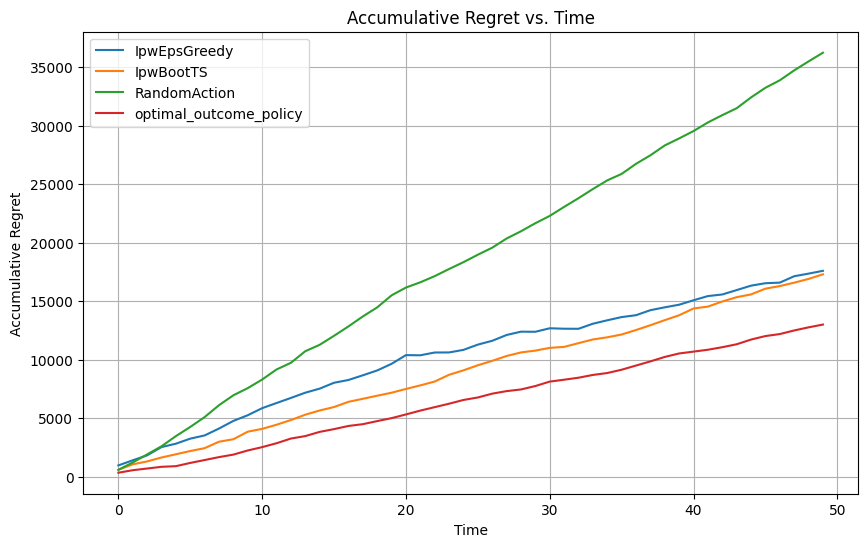

In [7]:
import matplotlib.pyplot as plt

# Plot accumulative regret vs. time (index)
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        ax.plot(data.index, data[column], label=column.replace('accumulative_regret_', ''))

ax.set_xlabel('Time')
ax.set_ylabel('Accumulative Regret')
ax.set_title('Accumulative Regret Compare to Optimal Action vs. Time')
ax.legend()

plt.grid(True)
plt.show()


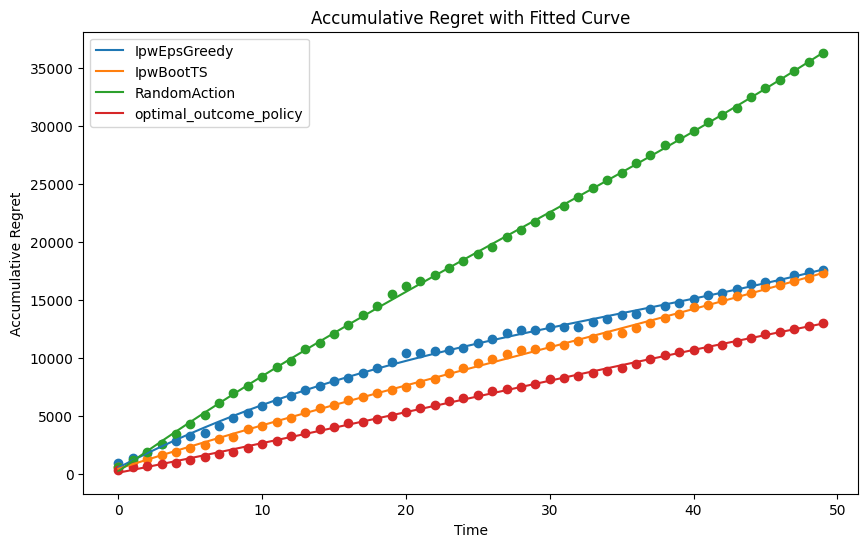

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the time index as x
x = np.arange(len(data))

# Define a function to fit the curve, using a polynomial function for simplicity
def poly_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit the curve

plt.figure(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        y = data[column].values
        params, params_covariance = curve_fit(poly_func, x, y)
        plt.scatter(x, y)
        plt.plot(x, poly_func(x, *params), label=column.replace('accumulative_regret_', ''))

# Plot the original data and the fitted curve


plt.title('Accumulative Regret with Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Accumulative Regret')
plt.legend()
plt.show()
